In [1]:
from fastai.vision.all import *
path = Path('/root/Documents/images')

In [2]:
(path).ls()

(#144) [Path('/root/Documents/images/Amblyglyphidodon aureus'),Path('/root/Documents/images/Carassius auratus'),Path('/root/Documents/images/Abudefduf vaigiensis'),Path('/root/Documents/images/Cyprinella lutrensis'),Path('/root/Documents/images/Luxilus cornutus'),Path('/root/Documents/images/Chrysiptera taupou'),Path('/root/Documents/images/Phoxinus phoxinus'),Path('/root/Documents/images/Abudefduf sexfasciatus'),Path('/root/Documents/images/Notropis hudsonius'),Path('/root/Documents/images/Hesperoleucus symmetricus')...]

In [3]:
df_path = Path('/root/Documents/')
df = pd.read_csv(df_path/"csv/families_3.csv")

In [4]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(4),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

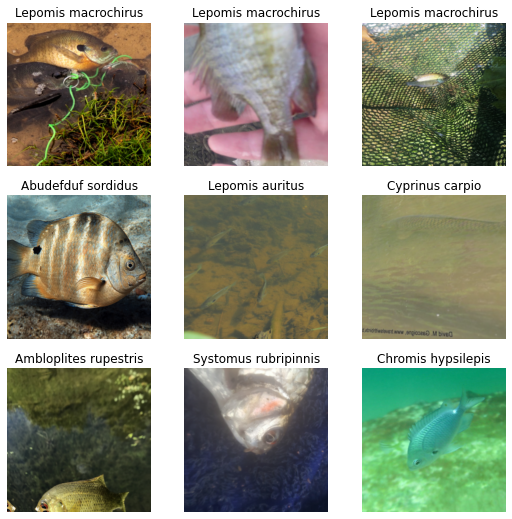

In [5]:
dls.show_batch(nrows=3, ncols=3)

In [6]:
fishes.summary(df)

Setting-up type transforms pipelines
0      Cypriniformes     Cyprinidae   Xenocyprinae  Hypophthalmichthys   
1        Perciformes  Pomacentridae  Pomacentrinae           Dascyllus   
2        Perciformes  Centrarchidae            NaN         Micropterus   
3      Cypriniformes     Cyprinidae     Cyprininae            Cyprinus   
4        Perciformes  Pomacentridae  Pomacentrinae           Abudefduf   
...              ...            ...            ...                 ...   
86383  Cypriniformes     Cyprinidae     Gobioninae       Pseudorasbora   
86384  Cypriniformes     Cyprinidae  Ex-danioninae           Parazacco   
86385    Perciformes  Centrarchidae            NaN         Micropterus   
86386    Perciformes  Centrarchidae            NaN             Lepomis   
86387    Perciformes  Pomacentridae  Pomacentrinae           Abudefduf   

                            Specie                                     fname  \
0      Hypophthalmichthys molitrix  Hypophthalmichthys molitrix/3545

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.700886,1.432467,0.388702,07:26


In [11]:
learn.unfreeze()

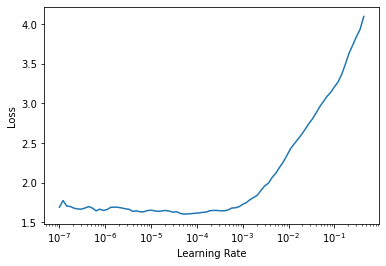

In [12]:
lr_min, lr_steep = learn.lr_find()

In [13]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 5.25e-06, steepest point: 3.31e-06


In [14]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.530707,1.330290,0.365725,07:27
1,1.404582,1.212682,0.341301,07:27
2,1.304962,1.111720,0.312363,07:26
3,1.221627,1.066263,0.299803,07:27
4,1.157194,1.047158,0.296678,07:27
5,1.119916,1.045694,0.295347,07:26


In [15]:
learn.export('species144-resnet34-6epochs.pkl')

In [16]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.516666,1.236930,0.341822,07:51


In [17]:
learn.unfreeze()

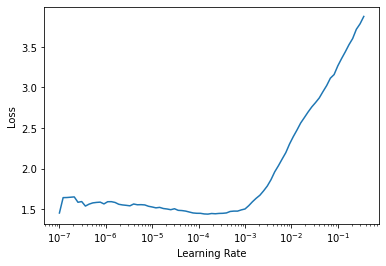

In [18]:
lr_min, lr_steep = learn.lr_find()

In [19]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.58e-05, steepest point: 1.58e-06


In [20]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.310503,1.159404,0.325038,09:37
1,1.210914,1.030128,0.289617,09:37
2,1.077644,0.965499,0.271038,09:37
3,1.003226,0.919441,0.259116,09:38
4,0.964275,0.900465,0.252460,09:37
5,0.952292,0.890096,0.249740,09:38


In [21]:
learn.export('species144-resnet50-6epochs.pkl')

In [23]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.949397,0.888053,0.249219,09:37
1,0.877651,0.843835,0.236370,09:39
2,0.851429,0.834456,0.233650,09:37


In [24]:
learn.export('species144-resnet50-9epochs.pkl')

In [13]:
weights_path = Path('/root/Documents/weights/')

In [21]:
# learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn = load_learner(weights_path/'species144-resnet50-9epochs.pkl', cpu=False)
learn.dls = dls

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.873088,0.830322,0.234576,09:46
1,0.809758,0.799152,0.224737,09:46
2,0.775140,0.786741,0.221438,09:47


In [24]:
learn.export(weights_path/'species144-resnet50-12epochs.pkl')

In [25]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.778463,0.787165,0.220396,09:47
1,0.703972,0.755707,0.211367,09:48
2,0.667094,0.755109,0.210325,09:47


In [26]:
learn.export(weights_path/'species144-resnet50-15epochs.pkl')

In [27]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.712553,0.756720,0.211367,09:47
1,0.680766,0.734456,0.204827,09:47
2,0.608303,0.728875,0.203612,09:46


In [28]:
learn.export(weights_path/'species144-resnet50-18epochs.pkl')

In [29]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.647882,0.744228,0.210036,09:46
1,0.608146,0.716514,0.199387,09:47
2,0.543353,0.706120,0.195046,09:47


In [30]:
learn.export(weights_path/'species144-resnet50-21epochs.pkl')

In [31]:
learn.fit_one_cycle(3, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.636704,0.722385,0.202628,09:46
1,0.565434,0.696914,0.195104,09:47
2,0.508308,0.686259,0.189142,09:47


In [32]:
learn.export(weights_path/'species144-resnet50-24epochs.pkl')